# Clinical trials 데이터 가지고 놀기

- clinical trial org 에서 API를 제공
- csv 파일로 다운받아서 시각화

In [2]:
import plotly.express as px
import pandas as pd
import datetime as dt

In [3]:
df = pd.read_csv(
    "../input/2023-09-21_TIGIT.csv",
    parse_dates=["StartDate", "CompletionDate", "LastUpdatePostDate"],
)
df.head()

/tmp/ipykernel_9463/3617033605.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
/tmp/ipykernel_9463/3617033605.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


,Unnamed: 0,Rank,NCTId,Condition,BriefTitle,OverallStatus,LeadSponsorName,StartDate,CompletionDate,LastUpdatePostDate,Phase,WhyStopped
0,0,1,NCT04818619,Chronic Myeloid Leukemia,TIGIT in Patients With Chronic Myeloid Leukemia,Unknown status,Assiut University,2021-04-01,2022-12-01,2021-03-29,NaN,NaN
1,1,2,NCT04150965,Multiple Myeloma|Relapsed Refractory Multiple ...,"Immuno-Oncology Drugs Elotuzumab, Anti-LAG-3 a...","Active, not recruiting",Multiple Myeloma Research Consortium,2020-06-30,2024-12-18,2023-07-28,Phase 1|Phase 2,NaN
2,2,3,NCT04995523,Non-Small-Cell Lung Carcinoma,A Study of AZD2936 Anti-TIGIT/Anti-PD-1 Bispec...,Recruiting,AstraZeneca,2021-09-14,2025-07-14,2023-09-11,Phase 1|Phase 2,NaN
3,3,4,NCT05607563,Advanced Tumor,A Study of PM1009 (Anti-TIGIT/PVRIG) in Patien...,Recruiting,Biotheus Inc.,2022-11-21,2023-12-01,2023-02-08,Phase 1,NaN
4,4,5,NCT05537051,Advanced Solid Tumours,A Study of PM1021 (Anti-TIGIT) With or Without...,Not yet recruiting,Biotheus Inc.,2023-10-30,2025-12-31,2023-02-08,Phase 1,NaN


In [4]:
df2 = df[df["WhyStopped"].isnull()]
df[~df["WhyStopped"].isnull()]

,Unnamed: 0,Rank,NCTId,Condition,BriefTitle,OverallStatus,LeadSponsorName,StartDate,CompletionDate,LastUpdatePostDate,Phase,WhyStopped
12,12,13,NCT03119428,Locally Advanced Cancer|Metastatic Cancer,A Study of OMP-313M32 in Subjects With Locally...,Terminated,"OncoMed Pharmaceuticals, Inc.",2017-05-02,2019-05-15,2020-08-11,Phase 1,Sponsor decision
19,19,20,NCT05019677,Intrahepatic Cholangiocarcinoma,GP Chemotherapy in Combination With Tislelizum...,Withdrawn,Fudan University,2021-09-01,2024-12-01,2022-04-04,Phase 2,Repeat registration
49,49,50,NCT05253105,"Previously Treated, Advanced|Malignancies",A Clinical Study of TAB006 in Patients With Pr...,Withdrawn,"Shanghai Junshi Bioscience Co., Ltd.",2022-03-15,2027-01-01,2022-05-31,Phase 1,transfer the study to another sponser
73,73,74,NCT05809895,Triple Negative Breast Cancer,Phase II Study Evaluating the Efficacy and Saf...,Withdrawn,Novartis Pharmaceuticals,2023-09-15,2029-07-18,2023-07-24,Phase 2,"Business decision, not driven by safety concer..."
85,85,86,NCT04774484,End Stage Renal Disease,High-Intensity Interval Training and Regulator...,Withdrawn,Francesc Marti,2023-01-01,2026-06-30,2023-02-14,Not Applicable,Funding was not available.
86,86,87,NCT03661047,Colon Cancer,OMega-3 Fatty Acid for the Immune Modulation o...,Withdrawn,Massachusetts General Hospital,2019-11-30,2021-11-30,2021-11-17,Phase 2,Study will be closed due to zero enrollment in...
92,92,93,NCT03342417,Breast Cancer Female|Ovarian Cancer|Gastric Ca...,Combination of Nivolumab and Ipilimumab in Bre...,Terminated,ExcellaBio LLC,2018-02-14,2019-05-29,2021-11-09,Phase 2,Slow patient accrual


In [8]:
df[~df["WhyStopped"].isnull()]

,Unnamed: 0,Rank,NCTId,Condition,BriefTitle,OverallStatus,LeadSponsorName,StartDate,CompletionDate,LastUpdatePostDate,Phase,WhyStopped
12,12,13,NCT03119428,Locally Advanced Cancer|Metastatic Cancer,A Study of OMP-313M32 in Subjects With Locally...,Terminated,"OncoMed Pharmaceuticals, Inc.",2017-05-02,2019-05-15,2020-08-11,Phase 1,Sponsor decision
19,19,20,NCT05019677,Intrahepatic Cholangiocarcinoma,GP Chemotherapy in Combination With Tislelizum...,Withdrawn,Fudan University,2021-09-01,2024-12-01,2022-04-04,Phase 2,Repeat registration
49,49,50,NCT05253105,"Previously Treated, Advanced|Malignancies",A Clinical Study of TAB006 in Patients With Pr...,Withdrawn,"Shanghai Junshi Bioscience Co., Ltd.",2022-03-15,2027-01-01,2022-05-31,Phase 1,transfer the study to another sponser
73,73,74,NCT05809895,Triple Negative Breast Cancer,Phase II Study Evaluating the Efficacy and Saf...,Withdrawn,Novartis Pharmaceuticals,2023-09-15,2029-07-18,2023-07-24,Phase 2,"Business decision, not driven by safety concer..."
85,85,86,NCT04774484,End Stage Renal Disease,High-Intensity Interval Training and Regulator...,Withdrawn,Francesc Marti,2023-01-01,2026-06-30,2023-02-14,Not Applicable,Funding was not available.
86,86,87,NCT03661047,Colon Cancer,OMega-3 Fatty Acid for the Immune Modulation o...,Withdrawn,Massachusetts General Hospital,2019-11-30,2021-11-30,2021-11-17,Phase 2,Study will be closed due to zero enrollment in...
92,92,93,NCT03342417,Breast Cancer Female|Ovarian Cancer|Gastric Ca...,Combination of Nivolumab and Ipilimumab in Bre...,Terminated,ExcellaBio LLC,2018-02-14,2019-05-29,2021-11-09,Phase 2,Slow patient accrual


In [9]:
df2["OverallStatus"].value_counts()

OverallStatus
Recruiting                52
Active, not recruiting    19
Not yet recruiting         8
Completed                  7
Unknown status             3
Name: count, dtype: int64

In [10]:
df2["Phase"].value_counts()

Phase
Phase 2            28
Phase 1            22
Phase 1|Phase 2    18
Phase 3             9
Not Applicable      2
Phase 2|Phase 3     1
Early Phase 1       1
Phase 4             1
Name: count, dtype: int64

In [11]:
df2["Condition"].value_counts()
s = df2["Condition"].str.split(pat="|")
s

0                            [Chronic Myeloid Leukemia]
1     [Multiple Myeloma, Relapsed Refractory Multipl...
2                       [Non-Small-Cell Lung Carcinoma]
3                                      [Advanced Tumor]
4                              [Advanced Solid Tumours]
                            ...                        
90                                [Nerve Sheath Tumors]
91                              [HIV Infection Primary]
93          [Basal Cell Carcinoma of the Head and Neck]
94                                   [Insomnia, Cancer]
95                              [Carcinoma, Renal Cell]
Name: Condition, Length: 89, dtype: object

In [12]:
my_dict = {}
for keys in s:
    # Iterate through the list of keys
    for key in keys:
        # Check if the key already exists in the dictionary
        if key in my_dict:
            # If the key exists, increment the value by 1
            my_dict[key] += 1
        else:
            # If the key doesn't exist, initialize it with a value of 1
            my_dict[key] = 1

In [13]:
# my_dict

# 시각화

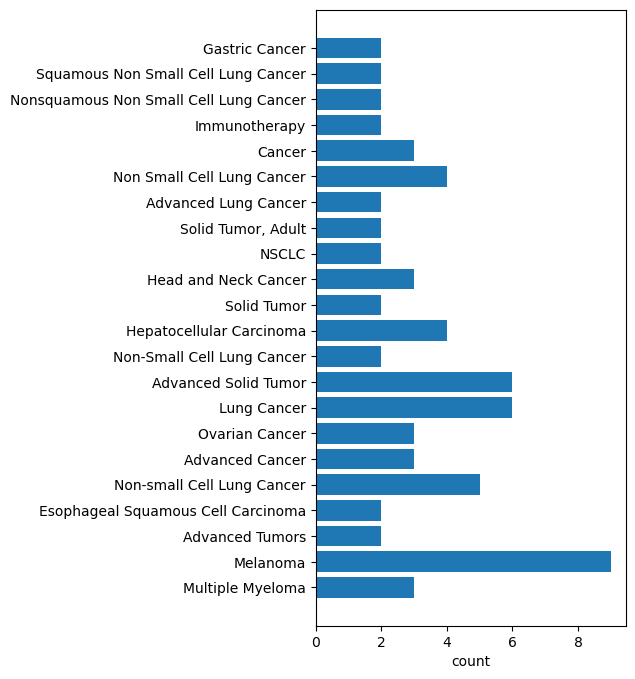

In [15]:
import matplotlib.pyplot as plt


def filter_func(item):
    key, value = item
    return value >= 2


# Your dictionary containing counts and keys
filtered_dict = dict(filter(filter_func, my_dict.items()))


# Extract keys and counts from the dictionary
keys = list(filtered_dict.keys())
counts = list(filtered_dict.values())

# Create a bar plot
plt.figure(figsize=(4, 8))  # Optional: Set the figure size
plt.barh(keys, counts)

# Adding labels and title
plt.xlabel("count")
plt.ylabel("")
plt.title("")

# Show the plot
# plt.tight_layout()
plt.show()

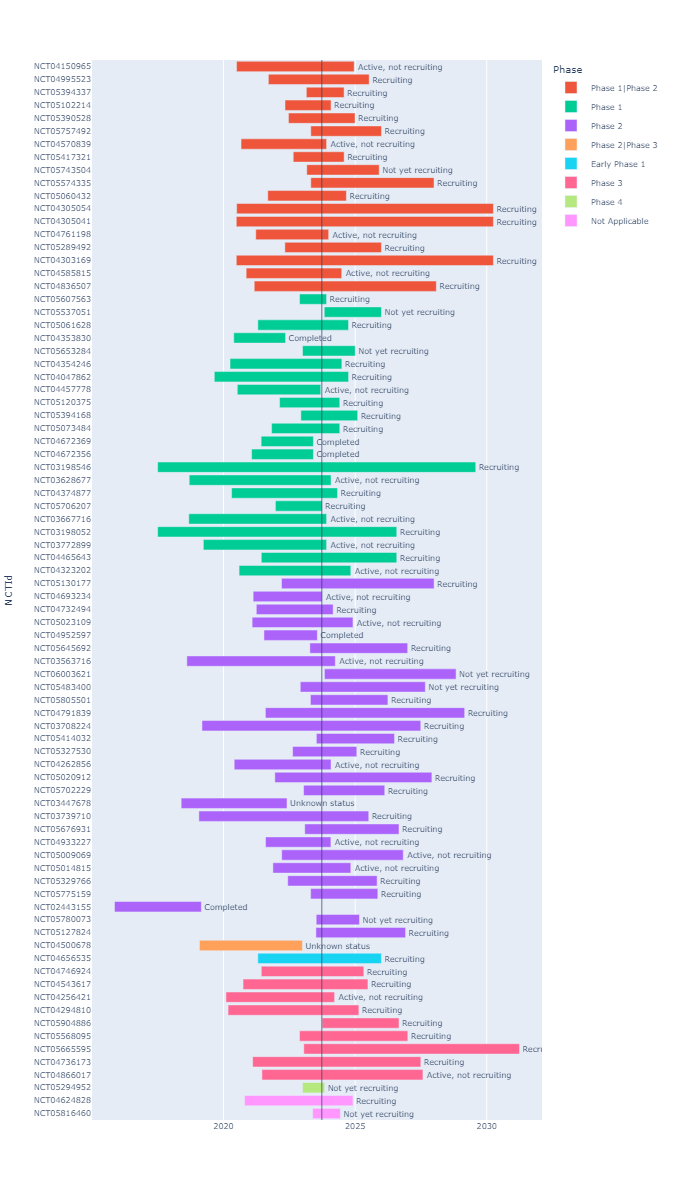

In [60]:
now = dt.datetime.now()
today = now.strftime("%Y-%m-%d")
data = df2

fig = px.timeline(
    data,
    x_start="StartDate",
    x_end="CompletionDate",
    # pattern_shape="OverallStatus",
    hover_name="LeadSponsorName",
    text="OverallStatus",
    y="NCTId",
    color="Phase",
    width=700,
    height=1200,
)
fig.update_yaxes(autorange="reversed")

# 수직 영역 표시
fig.add_vrect(
    x0=today,
    x1=today,
    annotation_text="",
    annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green",
    opacity=0.5,
    line_width=1,
)

fig.update_layout(
    font=dict(
        # family="Courier New, monospace",
        size=8,  # Set the font size here
        # color="RebeccaPurple"
    )
)
fig.update_traces(textposition="outside")
fig.show()

# HTML 파일로 저장하기
fig.write_html("../output/TIGIT_clinicalTrials.html")

## 필요없는 데이터는 제외하고 다시 그리기

In [31]:
# # Define the object you want to remove
# list_to_remove = [
#     "NCT04500678", "NCT05294952","NCT04624828","NCT5816460",
#     "NCT0656535",
# # ]

# # Apply a lambda function to filter rows based on the presence of the object
# filtered_df = df2[df2['NCTId'].apply(lambda x: not all(item in x for item in list_to_remove))]

mask = df2["NCTId"].isin(
    [
        "NCT04500678",
        "NCT05294952",
        "NCT04624828",
        "NCT05816460",
        "NCT0656535",
        "NCT04656535",
    ]
)
filtered_df = df2.loc[~mask]

In [32]:
filtered_df.tail()

,Unnamed: 0,Rank,NCTId,Condition,BriefTitle,OverallStatus,LeadSponsorName,StartDate,CompletionDate,LastUpdatePostDate,Phase,WhyStopped
89,89,90,NCT03772899,Melanoma,Fecal Microbial Transplantation in Combination...,"Active, not recruiting",Lawson Health Research Institute,2019-03-27,2023-12-01,2023-06-26,Phase 1,NaN
90,90,91,NCT04465643,Nerve Sheath Tumors,Neoadjuvant Nivolumab Plus Ipilimumab for Newl...,Recruiting,Sidney Kimmel Comprehensive Cancer Center at J...,2021-06-08,2026-08-01,2023-07-03,Phase 1,NaN
91,91,92,NCT05780073,HIV Infection Primary,Safety and Impact of Dasatinib on Viral Persis...,Not yet recruiting,Fundació Institut Germans Trias i Pujol,2023-07-10,2025-03-01,2023-07-10,Phase 2,NaN
93,93,94,NCT04323202,Basal Cell Carcinoma of the Head and Neck,Neoadjuvant-Adjuvant Pembrolizumab in Resectab...,"Active, not recruiting",Brian Gastman,2020-08-04,2024-11-01,2023-06-07,Phase 1,NaN
95,95,96,NCT05127824,"Carcinoma, Renal Cell",Autologous Dendritic Cell Vaccine in Kidney Ca...,Recruiting,Jodi Maranchie,2023-07-06,2026-12-01,2023-07-19,Phase 2,NaN


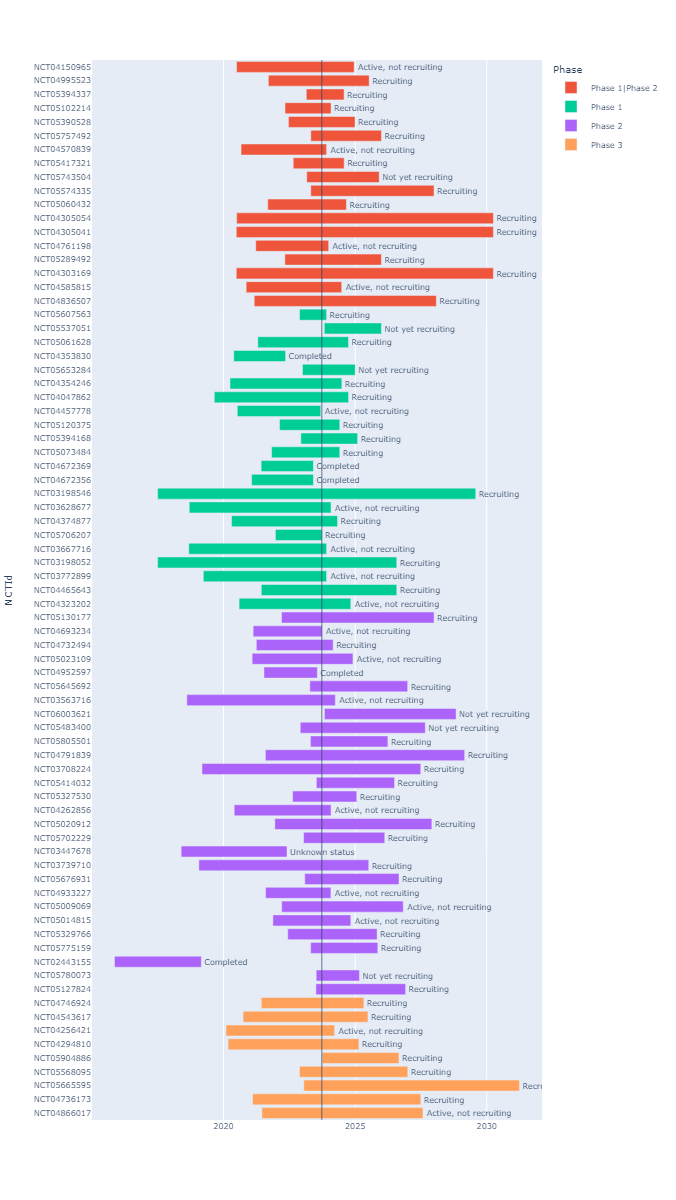

In [34]:
now = dt.datetime.now()
today = now.strftime("%Y-%m-%d")
data = filtered_df

fig = px.timeline(
    data,
    x_start="StartDate",
    x_end="CompletionDate",
    # pattern_shape="OverallStatus",
    hover_name="LeadSponsorName",
    text="OverallStatus",
    y="NCTId",
    color="Phase",
    width=700,
    height=1200,
)
fig.update_yaxes(autorange="reversed")

# 수직 영역 표시
fig.add_vrect(
    x0=today,
    x1=today,
    annotation_text="",
    annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green",
    opacity=0.5,
    line_width=1,
)

fig.update_layout(
    font=dict(
        # family="Courier New, monospace",
        size=8,  # Set the font size here
        # color="RebeccaPurple"
    )
)
fig.update_traces(textposition="outside")
fig.show()

# HTML 파일로 저장하기
fig.write_html("../output/TIGIT_clinicalTrials.html")

In [32]:
df = pd.read_csv(
    "../input/2023-09-21_PD-1.csv",
    parse_dates=["StartDate", "CompletionDate", "LastUpdatePostDate"],
    date_format="mixed",
)
df2 = df[df["WhyStopped"].isnull()]
df[~df["WhyStopped"].isnull()]

,Unnamed: 0,Rank,NCTId,Condition,BriefTitle,OverallStatus,LeadSponsorName,StartDate,CompletionDate,LastUpdatePostDate,Phase,WhyStopped
49,49,50,NCT03779100,Intrahepatic Cholangiocarcinoma,Lenvatinib Plus PD-1 Antibody for Unresectable...,Suspended,Shi Ming,2018-12-17,2019-12-31,2019-01-28,Phase 2,Protocol modification
83,83,84,NCT04001101,Microsatellite Instability High|Mismatch Repai...,Anti-PD-1 +/- RT for MSI-H Solid Tumors,Withdrawn,"University of Colorado, Denver",2019-10-10,2021-11-17,2021-11-30,Phase 2,PI has decided to withdraw the study
98,98,99,NCT03746249,Hepatocellular Carcinoma,Phase II of Lenvatinib Plus PD-1 Antibody for ...,Withdrawn,Sun Yat-sen University,2018-12-17,2019-12-01,2019-04-17,Phase 2,No participants enrolled
99,99,100,NCT04775680,Solid Tumor|Non Hodgkin Lymphoma,Study of ADG106 In Combination With PD-1 Antib...,Terminated,Adagene (Suzhou) Limited,2021-03-11,2023-02-09,2023-04-24,Phase 1|Phase 2,The safety of ADG106 combined with triprilimab...
107,107,108,NCT03744247,Hepatocellular Carcinoma,Lenvatinib Plus PD-1 Antibody Versus Lenvtinib...,Withdrawn,Sun Yat-sen University,2019-04-21,2021-06-01,2019-05-02,Phase 3,No paritcipants enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...
3880,880,3881,NCT04774484,End Stage Renal Disease,High-Intensity Interval Training and Regulator...,Withdrawn,Francesc Marti,2023-01-01,2026-06-30,2023-02-14,Not Applicable,Funding was not available.
3882,882,3883,NCT04834349,Recurrent Head and Neck Squamous Cell Carcinom...,Re-irradiation With NBTXR3 in Combination With...,Withdrawn,M.D. Anderson Cancer Center,2021-03-09,2022-11-21,2023-09-13,Phase 2,No participants were enrolled
3892,892,3893,NCT04810104,Parkinson Disease|Mild Cognitive Impairment,Parkinson's Disease With Mild Cognitive Impair...,Withdrawn,King's College London,2022-10-01,2024-04-01,2022-10-14,Phase 2,Delays due to COVID
3894,894,3895,NCT03709550,Castration Levels of Testosterone|Castration-R...,Enzalutamide and Decitabine in Treating Patien...,Withdrawn,Roswell Park Cancer Institute,2021-04-15,2024-04-15,2022-10-05,Phase 1|Phase 2,lack of funding


In [27]:
# df.dtypes
# df2['StartDate'] = pd.to_datetime(df2['StartDate'], format='mixed')
# df2['CompletionDate'] = pd.to_datetime(df2['CompletionDate'], format='mixed')

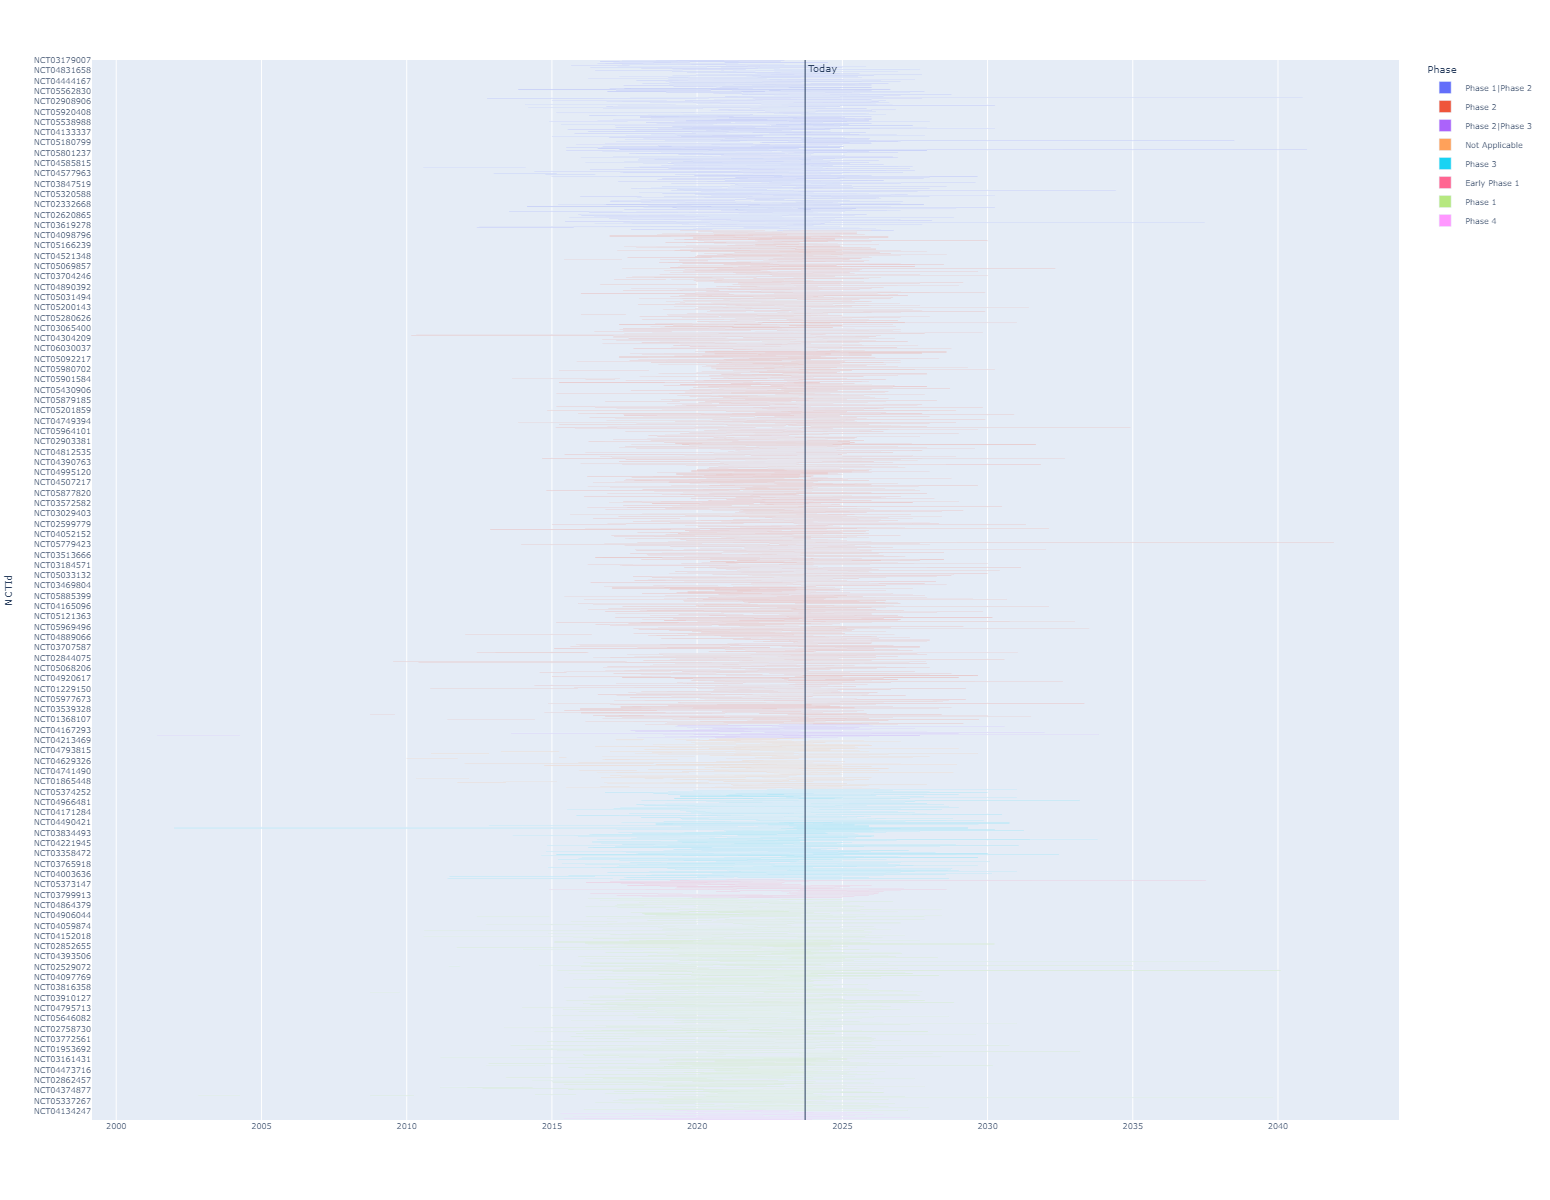

In [33]:
now = dt.datetime.now()
today = now.strftime("%Y-%m-%d")
data = df2

fig = px.timeline(
    data,
    x_start="StartDate",
    x_end="CompletionDate",
    # pattern_shape="LeadSponsorName",
    hover_name="LeadSponsorName",
    y="NCTId",
    color="Phase",
    width=600,
    height=1200,
)
fig.update_yaxes(autorange="reversed")

# 수직 영역 표시
fig.add_vrect(
    x0=today,
    x1=today,
    annotation_text="Today",
    annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green",
    opacity=0.7,
    line_width=1,
)

fig.update_layout(
    font=dict(
        # family="Courier New, monospace",
        size=8,  # Set the font size here
        # color="RebeccaPurple"
    )
)

fig.show()

In [28]:
df = pd.read_csv(
    "../input/2023-09-21_TREM2.csv",
    parse_dates=["StartDate", "CompletionDate", "LastUpdatePostDate"],
    date_format="mixed",
)
df2 = df[df["WhyStopped"].isnull()]
df[~df["WhyStopped"].isnull()]

,Unnamed: 0,Rank,NCTId,Condition,BriefTitle,OverallStatus,LeadSponsorName,StartDate,CompletionDate,LastUpdatePostDate,Phase,WhyStopped


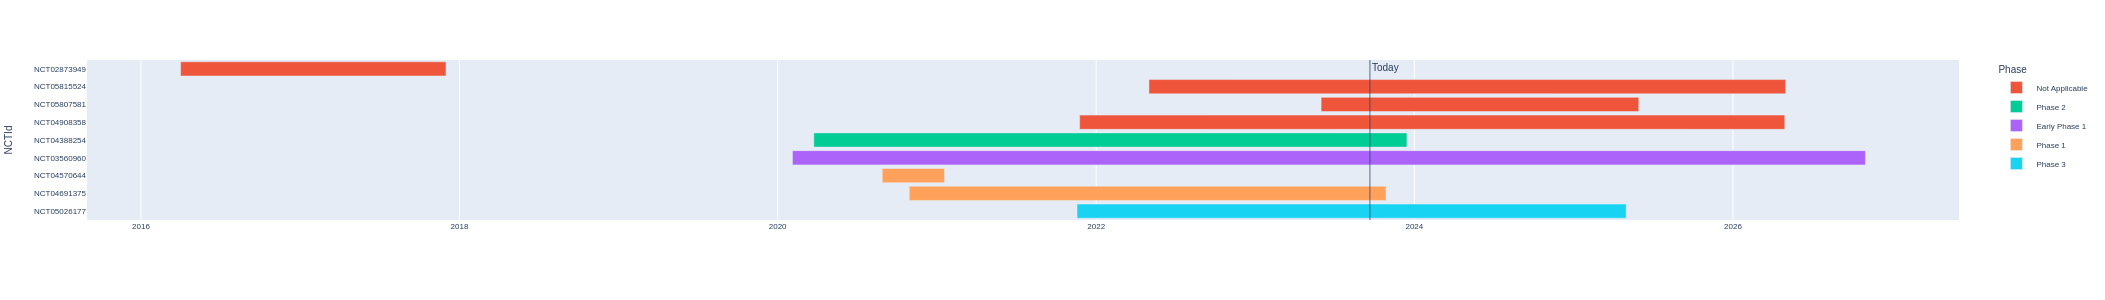

In [31]:
now = dt.datetime.now()
today = now.strftime("%Y-%m-%d")
data = df2

fig = px.timeline(
    data,
    x_start="StartDate",
    x_end="CompletionDate",
    # pattern_shape="LeadSponsorName",
    hover_name="LeadSponsorName",
    y="NCTId",
    color="Phase",
    width=600,
    height=300,
)
fig.update_yaxes(autorange="reversed")

# 수직 영역 표시
fig.add_vrect(
    x0=today,
    x1=today,
    annotation_text="Today",
    annotation_position="top left",
    annotation=dict(font_size=10),
    fillcolor="green",
    opacity=0.5,
    line_width=1,
)

fig.update_layout(
    font=dict(
        # family="Courier New, monospace",
        size=8,  # Set the font size here
        # color="RebeccaPurple"
    )
)

fig.show()